## Assignment 5 - Neural Networks
### CS450 Fall 2022

This assignment contains 3 problems.
We will not use a grading script for this assignment, but the grading criteria is explained in the instructions.


## STEP 0
*COPY NOTEBOOK TO YOUR DRIVE*

Student Name: Grant Wilson
<br>If you used pair programming..
<br>Programming Partner: Manuel Osuna


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
tf.random.set_seed(1)

### Problem 1 - MNIST Data Set (10 points)
* Use the MNIST dataset to classify the type of apparel using an artificial nueral network.
* https://www.kaggle.com/zalando-research/fashionmnist
* You may use the library of your choosing
* We went over this is class, so this is an easy one to get you started.
* Grading criteria: Your results on the test data should exceed 0.80 accuracy and you have some explaination about the model.


In [ ]:
### You code here
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
# Normalization
# Makes the image range between 0 and 1
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
# Reshape into a One-dimensional vector
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [ ]:
# Create Model Object
model = tf.keras.models.Sequential()

In [ ]:
#Add the first fully connected layer
model.add(tf.keras.layers.Dense(units = 128, activation = 'relu', input_shape = (784,)))

In [ ]:
# Add a dropout layer
model.add(tf.keras.layers.Dropout(0.2))

In [ ]:
# Add output layer
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))

In [ ]:
# Complie the model
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])


In [ ]:
# Train the model
model.fit(X_train, y_train, epochs =5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3223 - sparse_categorical_accuracy: 0.8818
Epoch 2/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3091 - sparse_categorical_accuracy: 0.8849
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3019 - sparse_categorical_accuracy: 0.8893
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2941 - sparse_categorical_accuracy: 0.8900
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2879 - sparse_categorical_accuracy: 0.8918


In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3370 - sparse_categorical_accuracy: 0.8833


In [ ]:
print("Test Accuracy",test_accuracy)


Test Accuracy 0.8833000063896179


Provide an explanation on how you picked the initial parameters: The hyperparameters that were picked were 128 neurons, ReLU activation function, and an input shape of 784. The input shape is based of the amount of classes, and neurons were selcted to work best with the size.


### Problem 2 - Poker Hand Classification (30 points)
* Use the Pokerhand dataset at https://archive.ics.uci.edu/ml/machine-learning-databases/poker/
* Pay attention to class distribution.
  * Do you need to do anything to balance the data?
* How does it affect ANNs if the training data is ordered?
* I mentioned early stopping in class but didn't go into detail. Implement early stopping in your model
  * This article provides an example of early stopping with Keras and Tensorflow
  * https://towardsdatascience.com/a-practical-introduction-to-early-stopping-in-machine-learning-550ac88bc8fd
  * Provide a visualization of training and cross validation loss at each epoch
* Provide a confusion matrix and F1 score for the test data
* The output of the model will be probabilities of each class. I like to use np.argmax to get the most probable class, but you may use other techniques.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from imblearn.over_sampling import RandomOverSampler

In [ ]:
names = ['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5','Class']

In [ ]:
dfPoker = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data",header=None,names=names)

In [ ]:
dfPoker.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Class
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


In [ ]:
dfPoker.dtypes

S1       int64
C1       int64
S2       int64
C2       int64
S3       int64
C3       int64
S4       int64
C4       int64
S5       int64
C5       int64
Class    int64
dtype: object

In [ ]:
### Your code here
print(dfPoker['Class'].value_counts())

0    12493
1    10599
2     1206
3      513
4       93
5       54
6       36
7        6
9        5
8        5
Name: Class, dtype: int64


As shown, class 0 and 1 have a majority of the data. This would cause issues during training. To balance the set, we use RandomOverSampler in order to over-sample to classes with small amounts of data, this will make sure that the data is balanced.

In [ ]:
oversampler = RandomOverSampler(random_state=42)
X, y = oversampler.fit_resample(dfPoker.drop('Class', axis=1), dfPoker['Class'])
dfPoker_balanced = pd.concat([X, y], axis=1)
print(dfPoker_balanced['Class'].value_counts())

9    12493
8    12493
1    12493
0    12493
4    12493
3    12493
2    12493
5    12493
6    12493
7    12493
Name: Class, dtype: int64


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dfPoker_balanced.drop('Class', axis=1), dfPoker_balanced['Class'], test_size=0.2, random_state=42)

In [ ]:
# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Define the neural network model
model = Sequential()
# Input Layer (input shape is 10 for the 10 classes)
model.add(Dense(64, input_shape=(10,), activation='relu'))
# Hidden Layers
model.add(Dense(48, activation='relu'))
model.add(Dense(12, activation='relu'))
# Output Layer
model.add(Dense(10, activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
print(X_train.shape)

(99944, 10)


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, callbacks=[early_stop])


Epoch 1/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.1398 - accuracy: 0.5705 - val_loss: 0.7925 - val_accuracy: 0.6883
Epoch 2/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.6935 - accuracy: 0.7121 - val_loss: 0.6485 - val_accuracy: 0.7244
Epoch 3/10
1250/1250 [==============================] - 3s 2ms/step - loss: 0.5992 - accuracy: 0.7377 - val_loss: 0.5847 - val_accuracy: 0.7462
Epoch 4/10
1250/1250 [==============================] - 3s 3ms/step - loss: 0.5560 - accuracy: 0.7509 - val_loss: 0.5627 - val_accuracy: 0.7444
Epoch 5/10
1250/1250 [==============================] - 3s 3ms/step - loss: 0.5301 - accuracy: 0.7585 - val_loss: 0.5340 - val_accuracy: 0.7547
Epoch 6/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.5107 - accuracy: 0.7672 - val_loss: 0.5179 - val_accuracy: 0.7631
Epoch 7/10
1250/1250 [==============================] - 3s 3ms/step - loss: 0.4972 - accuracy: 0.7760 - val_loss: 0.5417 - val_accuracy:

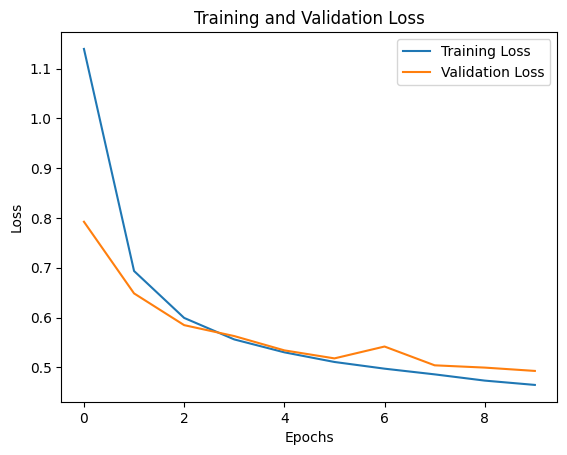

In [ ]:
# Plot the training and validation loss at each epoch
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Make predictions on the test data
y_pred_prob = model.predict(X_test)

781/781 [==============================] - 1s 1ms/step


In [ ]:
# Get the class with highest probability
y_pred = np.argmax(y_pred_prob, axis=1)


In [ ]:
for i, prob in enumerate(y_pred_prob[i]):
    print(f"Probability of class {i}: {prob:.4f}")

Probability of class 0: 0.0142
Probability of class 1: 0.1042
Probability of class 2: 0.1202
Probability of class 3: 0.7614
Probability of class 4: 0.0000
Probability of class 5: 0.0000
Probability of class 6: 0.0000
Probability of class 7: 0.0000
Probability of class 8: 0.0000
Probability of class 9: 0.0000


In [ ]:
# Create the confusion matrix for test data
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 896  769  319  433   22   10   16    4    0    1]
 [ 649  767  402  611   63    8   22    4    0    2]
 [ 462  707  724  602   78    0    6    2    0    0]
 [  83  172   77 2139   36    0    0    0    0    0]
 [   0    0    0    0 2485    0    0    0    0    0]
 [   0    0    0    0    0 2523    0    0    0    0]
 [   0    0    0    0    0    0 2439    0    0    0]
 [   0    0    0    0    0    0    0 2508    0    0]
 [   0    0    0    0    0    0    0    0 2488    0]
 [   0    0    0    0    0    0    0    0    0 2457]]


In [ ]:
# Calculate the F1 score for test data
f1 = f1_score(y_test, y_pred, average='macro')
print(f1)

0.7682551326480809


* Explain how you picked the number of nodes and the
number of hidden layers.
* Explain your data cleaning and fearture engineering tasks.


I selected the number of nodes and hidden layers through a trial and error process. Throughout multiple tests I got the best results with the amount that I used. Certain classes had a majority of the values, so in order to combat bias, the data was oversampled.

### Problem 3 - Parkinson's Telemonitoring (30 points)
* In class, we focused on artificial nueral networks for classification purposes
* Use the data set at https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/
   * The goal is to predict the 'motor_UPDRS'
   * Remove the 'total_UPDRS' column. The goal of the data set author is to predict both and 'total_UPDRS' but I don't want to have two predicted variables.
  * I also don't want to use it as a predictor because 'total_UPDRS' will be too colinear with 'motor_UPDRS'
* In this example, we want to use a regression ANN
* Use a 80/20 train test split for your model
* I acknowledge that you can solve this without an ANN, but please use a regression ANN
  * Make sure you look at fields that are numbers but are not truly ordinal. How would you handle them?
* This article provides an overview of regression ANN using Tensorflow.
  * https://towardsdatascience.com/regression-based-neural-networks-with-tensorflow-v2-0-predicting-average-daily-rates-e20fffa7ac9a


In [ ]:
dfParkinsons = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data")

In [ ]:
dfParkinsons.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [ ]:
dfParkinsons.describe()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


In [ ]:
dfParkinsons.drop(['total_UPDRS'],axis =1,inplace=True)

In [ ]:
### You code here

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
# Split into features and target
X = dfParkinsons.drop('motor_UPDRS', axis=1).values
y = dfParkinsons['motor_UPDRS'].values


In [ ]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mse')

In [ ]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=0)


Plot the history of the training validation data loss.

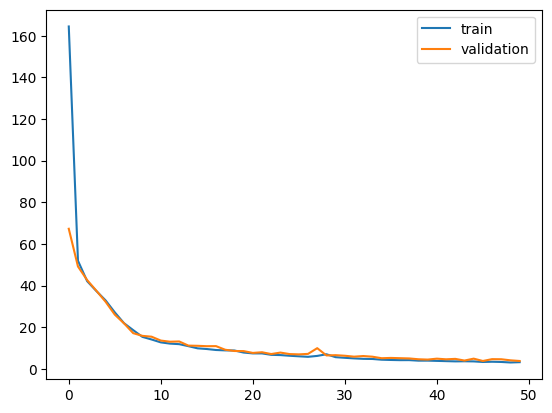

In [ ]:
# Plot the training/validation loss history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

Based on the history, how many epochs do you think you should have used while training the model?

I think that 50 is the correct amount of epochs to use for this. After about 50 epochs the validation loss stops improving.

For regression problems, we can measure residuals to guage accurancy. Plot a residuals graph and explain how you interpret it.

37/37 [==============================] - 0s 2ms/step


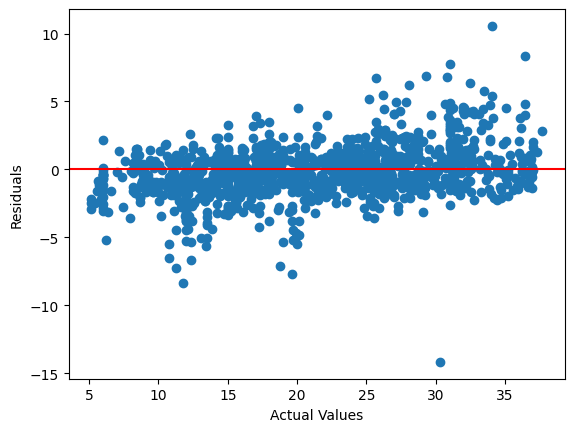

In [ ]:
# Predict the target variable for the test set
y_pred = model.predict(X_test).flatten()

# Calculate the residuals
residuals = y_test - y_pred

# Plot the residuals
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()


Intepretation of residual plot:


Mos tof the residuals are scattered near 0, this means the unbiased predictions are being made. The only issues persist around larger values, where it may over predict or near 10 and 20 where it under predicts.